# SentiStrength Sentiment Analysis
### with new sentiment lists of word forms and lemmas, emoticons, and emojis
### for 'raw' text samples

This python script below uses SentiStrength to classify the sentiment of each line of a text file in pandas dataframes.

### This script was published as a part of reserch work
This script was created and published by Merja Kreivi-Kauppinen.

This script is part of research work carried at University of Oulu in 2020-2023.

Topic of research work and thesis:
'Signs of Paradigm Shift in Hate Speech Detection Methodology: Hate Speech Detection of Dialectal, Granular and Urban Finnish'

### Method of sentiment analysis (SA) with SentiStrength

Binary, trinary, and polarity (multilabel) sentiment classification of social media text samples with SentiStrength SA were carried on tokenized or lemmatized text samples, where words, emoticons and emojis were used to get sentiment scoring.

Emoticons and emojis were taken into account in sentiment scoring.

SA with SentiStrength was carried in three separate processes: 
- (1) binary SA, 
- (2) trinary SA, and 
- (3) (multilabel) polarity SA.

Scoring was carried for 'raw' or manually 'corrected' text samples on separate processes.

Samples were preprpcessed with two steps:

- (1) Text samples were lemmatized with experimental Finnish Voikko method designed for Spacy (Spacy version 3.5.0) using large Finnish language model 'fi_core_news_lg' the source of tokens. Text samples were further tokenized with NLTK casual tokenization method, and set to lower capitals before feeding to SentiStrength scoring process.

- (2) Emojis of text samples were changed to english word forms before SentiStrength scoring.

Results were analyzed with methods of scikit-learn library by calculating confusion matrix, and accuracy, F1, precision and recall scores for tested classifiers.

### The original SentiStrength publicly available

Original version of SentiStrength method available at: 

http://sentistrength.wlv.ac.uk/#Download

References: 

 - Thelwall, M., Buckley, K., Paltoglou, G. Cai, D., & Kappas, A. (2010). Sentiment strength detection in short informal text. Journal of the American Society for Information Science and Technology, 61(12), 2544–2558.

 - Thelwall, M., Buckley, K., & Paltoglou, G. (2012). Sentiment strength detection for the social Web, Journal of the American Society for Information Science and Technology, 63(1), 163-173.
 
 - Thelwall, M., Buckley, K., & Paltoglou, G. (2011). Sentiment in Twitter events. Journal of the American Society for Information Science and Technology, 62(2), 406-418.

### Improved new lexicons for SentiStrength (in Finnish)

The modified SentiStrength (for Finnish social media text samples) use new Finnish SentiStrength lexicons for sentiment classification. Finnish SentiStrength for classification of Finnish text uses lexicon which includes basic, pended, subword and lemma forms of words and their polarity labels. All lexicons (words, emoticons, emojis) were provided on lexicographically descending order to enable more precise text, emoticon, symbol, and emoji matching.

- EmotionLookupTable - On (word based sentiment) emotion lexicon 'EmotionLookupTable.txt' each word is labeled with one sentiment label (between -5 and 5). New 'EmotionLookupTable' (for Finnish) includes 11512 word forms.

- EmoticonLookupTable - On emoticon and emoji lexicon 'EmoticonLookupTable.txt' each emoticon and emoji is labeled with one sentiment label (between -5 and 5). New 'EmoticonLookupTable' includes 527 emoticons and 613 emojis.

- IdiomLookupTable - On idiom lexicon 'IdiomLookupTable.txt' each idiom is labeled with one sentiment label (between -5 and 5). New 'IdiomLookupTable' (for Finnish) includes 353 entries.

- NegatingWordList - On negating word lexicon 'NegatingWordList.txt' each entry is labeled with one sentiment label (between -5 and 5). New 'NegatingWordList' (for Finnish) includes 37 entries.

- QuestionWords - On question words lexicon 'QuestionWords.txt' each entry is labeled with one sentiment label (between -5 and 5). New 'QuestionWords' (for Finnish) includes 19 entries.

- BoosterWordList - On booster words lexicon 'BoosterWordList.txt' each entry is labeled with one sentiment label (between -5 and 5). 'BoosterWordList' (for Finnish) includes 20 entries.


### Installation and Set Up

All experiments with SentiStrength -models were carried with lexicons mentioned above. The folder was added on the wheel of SentiStrength -methods as 'SentiStrength_FIN' -folder.

### Import and check  jupyter python installations, packages, and libraries

In [1]:
# import python packages and libraries
import subprocess
import shlex
import os.path

import sys, re, os
import numpy as np
import pandas as pd

import string, math 
import time, datetime, random

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import casual_tokenize, word_tokenize, sent_tokenize, WhitespaceTokenizer

import emoji
from emoji import *
import functools
import operator

The scikit-learn version is 1.1.2.


## Import Experimental Spacy and Voikko

In [2]:
# Import and check Spacy
import spacy
print(f"Spacy Version: {spacy.__version__}")

# Load large Finnish model for spacy
FinSpacyLarge = spacy.load("fi_core_news_lg")

# Test large Finnish model
doc = FinSpacyLarge('Terveyden ja hyvinvoinnin laitos (THL) johtaa hanketta. Ilmassa on kevättä. Rännit tippuvat ja katuojat juoksevat.')
for t in doc:
    print(f'{t.lemma_}\t{t.pos_}')

Spacy Version: 3.5.0
terveys	NOUN
ja	CCONJ
hyvinvointi	NOUN
laitos	NOUN
(	PUNCT
THL	NOUN
)	PUNCT
johtaa	VERB
hanke	NOUN
.	PUNCT
Ilmassa	NOUN
olla	AUX
kevät	NOUN
.	PUNCT
Rännit	NOUN
tippua	VERB
ja	CCONJ
katuoja	NOUN
juoksevat	VERB
.	PUNCT


In [3]:
from libvoikko import Voikko
print("\nCurrent working directory " , os.getcwd())

# set up Voikko search path for Voikko help
Voikko.setLibrarySearchPath("c:/Voikko")
help(Voikko)


Current working directory  C:\Users\merja\Desktop\HS_research_project\sentistrength
Help on class Voikko in module libvoikko:

class Voikko(builtins.object)
 |  Voikko(language, path=None)
 |  
 |  Represents an instance of Voikko. The instance has state, such as
 |  settings related to spell checking and hyphenation, and methods for performing
 |  various natural language analysis operations. One instance should not be
 |  used simultaneously from multiple threads.
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __init__(self, language, path=None)
 |      Creates a new Voikko instance with the following optional parameters:
 |      language  BCP 47 language tag to be used.
 |      path      Extra path that will be checked first when looking for linguistic
 |                resources.
 |  
 |  analyze(self, word)
 |      Analyze the morphology of given word and return the list of
 |      analysis results. The results are represented as maps having property
 |      names

In [4]:
# get Voikko directory list
print("\nVoikko directory list:  ", Voikko.listDicts("C:/Voikko"))

# get Voikko version
print("Voikko version:  ", Voikko.getVersion())


Voikko directory list:   [<fi,,standard,suomi (perussanasto)>, <fi,,dialects,suomi (murteellisten, vanhojen ja harvinaisten sanojen sanasto)>, <fi,,education,suomi (kasvatustieteen sanasto)>, <fi,,medicine,suomi (matematiikan, fysiikan, kemian, biologian, maantieteen, geologian ja lääketieteen sanastot)>, <fi,,morpho,suomi, erittäin laaja sanasto (mukana myös morfologisessa analyysissä tarvittava lisäinformaatio)>, <fi,,morphoid,suomi, erittäin laaja sanasto (mukana myös morfologisessa analyysissä tarvittava lisäinformaatio ja linkitys Joukahaiseen)>, <fi,,po,suomi (po-tiedostojen oikolukusanasto)>, <fi,,science,suomi (matematiikan, fysiikan, kemian, biologian, maantieteen, geologian, lääketieteen, kasvatustieteen ja tietotekniikan sanastot)>]
Voikko version:   4.3


In [5]:
# Test experimental Finnish Spacy model with Spacy

# Load experimental Finnish Spacy
FinSpacyExp = spacy.load("spacy_fi_experimental_web_md")

# Test the model
doc = FinSpacyExp('Terveyden ja hyvinvoinnin laitos (THL) johtaa hanketta. Ilmassa on kevättä. Rännit tippuvat ja katuojat juoksevat.')
for t in doc:
    print(f'{t.lemma_}\t{t.pos_}')

terveys	NOUN
ja	CCONJ
hyvinvointi	NOUN
laitos	NOUN
(	PUNCT
THL	PROPN
)	PUNCT
johtaa	VERB
hanke	NOUN
.	PUNCT
ilma	NOUN
olla	AUX
kevät	NOUN
.	PUNCT
ränni	NOUN
tippua	VERB
ja	CCONJ
katuoja	NOUN
juosta	VERB
.	PUNCT


### Download labeled HS data

In [6]:
# Download labeled HS data from xlsx file to pd dataFolder
cwd = os.getcwd()
folder = '\\data\\'
csv_file = 'Balanced_Dataset_Collection_ALL_2023Merja.xlsx'
#csv_file = 'Manually_Annotated_Collection_ALL_FINAL_22023Merja.xlsx'
csv_source = cwd + folder + csv_file
#print(csv_source)
df = pd.read_excel(csv_source)
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick
0,- - opetustilanteisiin,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
2,= Minulle on tullut Playboy vuodesta 1972 läh...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
3,=) (Juuri sellaiset joita suomessa myydään ha...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment
4,=) kristiina ja anna jatkoon! =),positive,3,False,0,NaN,NaN,NaN,FinnSentiment
...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,positive,5,False,0,NaN,NaN,NaN,Meria
16004,😠👉👩‍💼,negative,-3,False,0,NaN,NaN,NaN,Meria
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,positive,5,False,0,NaN,NaN,NaN,Meria
16006,🤮😡,negative,-4,False,0,NaN,NaN,NaN,Meria


In [7]:
# Change text samples to string
df["stringSample"] = df[str("sample")]

# add string len column
df["stringLength"] = ""

# extract string length measures of data
def extract_stringLen(df):
    for item in df["stringSample"]:
        #newframe["stringLength"] = len(str(item))
        df["stringLength"] = df.stringSample.str.len()
    return df

extract_stringLen(df)
df.head(50)

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength
0,- - opetustilanteisiin,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85
2,= Minulle on tullut Playboy vuodesta 1972 läh...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51
3,=) (Juuri sellaiset joita suomessa myydään ha...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116
4,=) kristiina ja anna jatkoon! =),positive,3,False,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34
5,=) Sussa vaan on jotakin mikä saa tän tytön p...,positive,3,False,0,NaN,NaN,NaN,FinnSentiment,=) Sussa vaan on jotakin mikä saa tän tytön p...,69
6,=DW =,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,=DW =,6
7,- 4-vuotias tyttö kokeillessaan ensimmäistä ke...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,- 4-vuotias tyttö kokeillessaan ensimmäistä ke...,57
8,- Akateemisuus vaalii Sokrateen ym.,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,- Akateemisuus vaalii Sokrateen ym.,35
9,- alhainen ikä - hyvin korkea ikä - ylipaino -...,neutral,0,False,0,NaN,NaN,NaN,FinnSentiment,- alhainen ikä - hyvin korkea ikä - ylipaino -...,217


In [8]:
# change sentiment values
df['sentiment'] = df['sentiment'].replace('neutral', 0)
df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', -1)

# change HS / not HS values
df['HSbinary'] = df['HSbinary'].replace(False, 0)
df['HSbinary'] = df['HSbinary'].replace(True, 1)
#df.head(10)
df.tail(20)

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength
15988,ÖÖ T:VITTU,-1,-4,1,2,NONE,TROLLING,SWEARING,Meria,ÖÖ T:VITTU,10
15989,ÖÖ7jaKuolemanKurvit,-1,-2,0,0,NaN,NaN,NaN,Meria,ÖÖ7jaKuolemanKurvit,19
15990,ööliä vittu,-1,-4,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,ööliä vittu,11
15991,öö-luokkalaiset.vittuun,-1,-5,1,2,NONE,TROLLING,"JOKE SARCASM, SWEARING",Meria,öö-luokkalaiset.vittuun,23
15992,öö-vittu,-1,-5,1,2,NONE,OTHER,"SWEARING, GRANULATED",Meria,öö-vittu,8
15993,ööö,-1,-1,0,0,NaN,NaN,NaN,Meria,ööö,3
15994,Ööö mitä vittua??,-1,-4,1,2,NONE,OPINION,"JOKE SARCASM, SWEARING",Meria,Ööö mitä vittua??,17
15995,Ööövittuentiiä,-1,-5,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,Ööövittuentiiä,14
15996,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",1,5,0,0,NaN,NaN,NaN,Meria,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",101
15997,👍🏻,1,1,0,0,NaN,NaN,NaN,Meria,👍🏻,2


In [9]:
# Lemmatization of raw samples
df['sampleLemmas'] = df['stringSample'].apply(lambda row: " ".join([token.lemma_ for token in FinSpacyExp(row)]))
df.tail(20)

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas
15988,ÖÖ T:VITTU,-1,-4,1,2,NONE,TROLLING,SWEARING,Meria,ÖÖ T:VITTU,10,ÖÖ T:VITTU
15989,ÖÖ7jaKuolemanKurvit,-1,-2,0,0,NaN,NaN,NaN,Meria,ÖÖ7jaKuolemanKurvit,19,öö7jakuolemankurvit
15990,ööliä vittu,-1,-4,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,ööliä vittu,11,ööliä vittu
15991,öö-luokkalaiset.vittuun,-1,-5,1,2,NONE,TROLLING,"JOKE SARCASM, SWEARING",Meria,öö-luokkalaiset.vittuun,23,öö-luokkalaiset.vittuun
15992,öö-vittu,-1,-5,1,2,NONE,OTHER,"SWEARING, GRANULATED",Meria,öö-vittu,8,öö-vittu
15993,ööö,-1,-1,0,0,NaN,NaN,NaN,Meria,ööö,3,ööö
15994,Ööö mitä vittua??,-1,-4,1,2,NONE,OPINION,"JOKE SARCASM, SWEARING",Meria,Ööö mitä vittua??,17,Ööö mitä vittu ? ?
15995,Ööövittuentiiä,-1,-5,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,Ööövittuentiiä,14,ööövittuentiiä
15996,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",1,5,0,0,NaN,NaN,NaN,Meria,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",101,"👍 ❤ hyvä Ville , sinä olla ilo kuunnella , nau..."
15997,👍🏻,1,1,0,0,NaN,NaN,NaN,Meria,👍🏻,2,👍 🏻


In [10]:
# Lower text
df['sample_tokens'] = df['sampleLemmas'].apply(lambda row: row.lower())
df.tail(20)

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens
15988,ÖÖ T:VITTU,-1,-4,1,2,NONE,TROLLING,SWEARING,Meria,ÖÖ T:VITTU,10,ÖÖ T:VITTU,öö t:vittu
15989,ÖÖ7jaKuolemanKurvit,-1,-2,0,0,NaN,NaN,NaN,Meria,ÖÖ7jaKuolemanKurvit,19,öö7jakuolemankurvit,öö7jakuolemankurvit
15990,ööliä vittu,-1,-4,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,ööliä vittu,11,ööliä vittu,ööliä vittu
15991,öö-luokkalaiset.vittuun,-1,-5,1,2,NONE,TROLLING,"JOKE SARCASM, SWEARING",Meria,öö-luokkalaiset.vittuun,23,öö-luokkalaiset.vittuun,öö-luokkalaiset.vittuun
15992,öö-vittu,-1,-5,1,2,NONE,OTHER,"SWEARING, GRANULATED",Meria,öö-vittu,8,öö-vittu,öö-vittu
15993,ööö,-1,-1,0,0,NaN,NaN,NaN,Meria,ööö,3,ööö,ööö
15994,Ööö mitä vittua??,-1,-4,1,2,NONE,OPINION,"JOKE SARCASM, SWEARING",Meria,Ööö mitä vittua??,17,Ööö mitä vittu ? ?,ööö mitä vittu ? ?
15995,Ööövittuentiiä,-1,-5,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,Ööövittuentiiä,14,ööövittuentiiä,ööövittuentiiä
15996,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",1,5,0,0,NaN,NaN,NaN,Meria,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",101,"👍 ❤ hyvä Ville , sinä olla ilo kuunnella , nau...","👍 ❤ hyvä ville , sinä olla ilo kuunnella , nau..."
15997,👍🏻,1,1,0,0,NaN,NaN,NaN,Meria,👍🏻,2,👍 🏻,👍 🏻


In [11]:
# Get emoji names for raw samples
df['sampleEmojis'] = df['sample_tokens'].apply(lambda row: emoji.demojize(row))
df.tail(20)

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens,sampleEmojis
15988,ÖÖ T:VITTU,-1,-4,1,2,NONE,TROLLING,SWEARING,Meria,ÖÖ T:VITTU,10,ÖÖ T:VITTU,öö t:vittu,öö t:vittu
15989,ÖÖ7jaKuolemanKurvit,-1,-2,0,0,NaN,NaN,NaN,Meria,ÖÖ7jaKuolemanKurvit,19,öö7jakuolemankurvit,öö7jakuolemankurvit,öö7jakuolemankurvit
15990,ööliä vittu,-1,-4,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,ööliä vittu,11,ööliä vittu,ööliä vittu,ööliä vittu
15991,öö-luokkalaiset.vittuun,-1,-5,1,2,NONE,TROLLING,"JOKE SARCASM, SWEARING",Meria,öö-luokkalaiset.vittuun,23,öö-luokkalaiset.vittuun,öö-luokkalaiset.vittuun,öö-luokkalaiset.vittuun
15992,öö-vittu,-1,-5,1,2,NONE,OTHER,"SWEARING, GRANULATED",Meria,öö-vittu,8,öö-vittu,öö-vittu,öö-vittu
15993,ööö,-1,-1,0,0,NaN,NaN,NaN,Meria,ööö,3,ööö,ööö,ööö
15994,Ööö mitä vittua??,-1,-4,1,2,NONE,OPINION,"JOKE SARCASM, SWEARING",Meria,Ööö mitä vittua??,17,Ööö mitä vittu ? ?,ööö mitä vittu ? ?,ööö mitä vittu ? ?
15995,Ööövittuentiiä,-1,-5,1,2,NONE,"OPINION, TROLLING","SWEARING, GRANULATED",Meria,Ööövittuentiiä,14,ööövittuentiiä,ööövittuentiiä,ööövittuentiiä
15996,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",1,5,0,0,NaN,NaN,NaN,Meria,"👍❤Hyvä Ville, sinua on ilo kuunnella, nautin a...",101,"👍 ❤ hyvä Ville , sinä olla ilo kuunnella , nau...","👍 ❤ hyvä ville , sinä olla ilo kuunnella , nau...",":thumbs_up: :red_heart: hyvä ville , sinä olla..."
15997,👍🏻,1,1,0,0,NaN,NaN,NaN,Meria,👍🏻,2,👍 🏻,👍 🏻,:thumbs_up: :light_skin_tone:


# Check SentiStrength files

Please change the locations below to point to the following on your computer: 
   * SentiStrength and the SentiStrength data folder to make this code work. 
   * These should be kept near or top of the code below.
   * The results will be saved to the data folder where the sample files are kept.
   * Use forward slashes ' / ' or double slashes ' \\ ' in folder path

In [12]:
#The location of SentiStrength on your computer

#SentiStrengthLocation = "C:/Users/merja/Desktop/HS_research_project/sentistrength/senti/SentiStrengthCom.jar"
SentiStrengthLocation = "C:\\Users\\merja\\Desktop\\HS_research_project\\sentistrength\\senti\\SentiStrengthCom.jar"

#SentiStrengthLanguageFolder_ENG = "C:/Users/merja/Desktop/HS_research_project/sentistrength/SentiStrength/"
SentiStrengthLanguageFolder_ENG = "C:\\Users\\merja\\Desktop\\HS_research_project\\sentistrength\\SentiStrength\\"

#SentiStrengthLanguageFolder_FIN = "C:/Users/merja/Desktop/HS_research_project/sentistrength/SentiStrength/SentiStrength_FIN/"
SentiStrengthLanguageFolder_FIN = "C:\\Users\\merja\\Desktop\\HS_research_project\\sentistrength\\SentiStrength\\SentiStrength_FIN\\"

The following code tests that the above three locations are correct. If you don't get an error message then this is fine.

In [13]:
if not os.path.isfile(SentiStrengthLocation):
    print("SentiStrength not found at: ", SentiStrengthLocation)
else: 
    print("SentiStrength found at: ", SentiStrengthLocation)
    
if not os.path.isdir(SentiStrengthLanguageFolder_ENG):
    print("SentiStrength data folder not found at: ", SentiStrengthLanguageFolder_ENG)
else:
    print("SentiStrength data folder found at: ", SentiStrengthLanguageFolder_ENG)

if not os.path.isdir(SentiStrengthLanguageFolder_FIN):
    print("SentiStrength data folder not found at: ", SentiStrengthLanguageFolder_FIN)
else:
    print("SentiStrength data folder found at: ", SentiStrengthLanguageFolder_FIN)

SentiStrength found at:  C:\Users\merja\Desktop\HS_research_project\sentistrength\senti\SentiStrengthCom.jar
SentiStrength data folder found at:  C:\Users\merja\Desktop\HS_research_project\sentistrength\SentiStrength\
SentiStrength data folder found at:  C:\Users\merja\Desktop\HS_research_project\sentistrength\SentiStrength\SentiStrength_FIN\


### Import and test sentiment rate functions

The code below allows SentiStrength to be called and run on a single line of text.

### Test sentiment rating for English Sample

The procedure / script below can be called to test if SentiStrength is working. 

This should generate the output 3 and -1.

You can change the text to classify something else if you like.

In [14]:
def RateSentiment_ENG(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_ENG + "'"),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') #Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    stdout_text = stdout_byte.decode("utf-8")  #convert from byte
    #remove the tab spacing between the positive and negative ratings. (e.g. 1 -5 -> 1 -5)
    stdout_text = stdout_text.rstrip().replace("\t"," ") 
    return stdout_text + " " + sentiString

print(RateSentiment_ENG("A lovely day!"))
print(RateSentiment_ENG("A lovely day!"))

3 -1 A lovely day!
3 -1 A lovely day!


### Test sentiment rating for Finnish sample

In [15]:
# Classify sentistrength positive (1 to 5) and negative (-1 to -5) sentiment strength separately
# This is the default and is used unless binary, trinary or scale is selected. 
# Note that 1 indicates no positive sentiment 
# and -1 indicates no negative sentiment. 
# There is no output of 0.

def RateSentiment_FIN(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'"),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing between the positive and negative ratings (e.g. 1 -5 -> 1 -5)
    # strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # add the tab spacing between result values and sample text
    return stdout_text + "\t" + sentiString

print(RateSentiment_FIN("Ihana päivä!!! :smiley:"))
print(RateSentiment_FIN("ihana päivä!!!:rolling_on_the_floor_laughing::smiley:"))
print(RateSentiment_FIN("Ihana päivä!!! :rolling_on_the_floor_laughing: :smiley:"))
print(RateSentiment_FIN("ihana päivä!!! rolling_on_the_floor_laughing smiley"))
print(RateSentiment_FIN(":smiley:"))
print(RateSentiment_FIN("smiley"))
print(RateSentiment_FIN(":rolling_on_the_floor_laughing:"))
print(RateSentiment_FIN(":smiley::rolling_on_the_floor_laughing:"))
print(RateSentiment_FIN(":smiley: :rolling_on_the_floor_laughing:"))
print(RateSentiment_FIN(":rolling_on_the_floor_laughing::smiley:"))
print(RateSentiment_FIN(":rolling_on_the_floor_laughing: :smiley:"))
print(RateSentiment_FIN("rolling_on_the_floor_laughing smiley"))

5	-1	Ihana päivä!!! :smiley:
5	-1	ihana päivä!!!:rolling_on_the_floor_laughing::smiley:
5	-1	Ihana päivä!!! :rolling_on_the_floor_laughing: :smiley:
5	-1	ihana päivä!!! rolling_on_the_floor_laughing smiley
3	-1	:smiley:
1	-1	smiley
4	-1	:rolling_on_the_floor_laughing:
1	-1	:smiley::rolling_on_the_floor_laughing:
1	-1	:smiley: :rolling_on_the_floor_laughing:
1	-1	:rolling_on_the_floor_laughing::smiley:
1	-1	:rolling_on_the_floor_laughing: :smiley:
1	-1	rolling_on_the_floor_laughing smiley


### Test binary, trinary and scale scoring

In [16]:
# sentistrength binary
# report results positive-negative classification
# The result is: (+ve classification) (-ve classification) (binary classification)

def RateSentiment_FIN_binary(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' binary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing between the positive and negative ratings (e.g. 1 -5 -> 1 -5)
    # strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    # add the tab spacing between result values and sample text
    #binary = stdout_text + "\t" + sentiString
    
    #return last value of list as binary value
    binary = items_list[2]
    #return int(binary)
    return binary

print("\nSentis binary results:  ", RateSentiment_FIN_binary("ihana päivä!!! ulkona paistaa aurinko"))
print("\nSentis binary results:  ", RateSentiment_FIN_binary("tämä lause on tyhjää täynnä"))
print("\nSentis binary results:  ", RateSentiment_FIN_binary("johan on tyhmä ja ruma ämmä"))


Sentis binary results:   1

Sentis binary results:   1

Sentis binary results:   -1


In [17]:
# sentistrength trinary
# report positive-negative-neutral classification
# The result is: (+ve classification) (-ve classification) (trinary classification)

def RateSentiment_FIN_trinary(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' trinary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing between the positive and negative ratings (e.g. 1 -5 -> 1 -5)
    # strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    # add the tab spacing between result values and sample text
    #binary = stdout_text + "\t" + sentiString
    
    #return last value of list as binary value
    trinary = items_list[2]
    return int(trinary)
    
    # add the tab spacing between result values and sample text
    #return stdout_text + "\t" + sentiString

print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("Ihana päivä!!! Ulkona paistaa aurinko"))
print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("tämä lause on tyhjää täynnä"))
print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("johan on tyhmä ja ruma ämmä"))
print("\nSentis trinary results:  ", RateSentiment_FIN_trinary("johan on tyhmä ja ruma ämmä :smiley:"))
print("\ntesting emojis")
print("\nSentis scale results:  ", RateSentiment_FIN_trinary("johan on tyhmä ja ruma ämmä :face_vomiting: :enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_trinary("johan on tyhmä ja ruma ämmä face_vomiting enraged_face"))
print("\nSentis scale results:  ", RateSentiment_FIN_trinary(":face_vomiting: :enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_trinary(":face_vomiting:"))
print("\nSentis scale results:  ", RateSentiment_FIN_trinary(":enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_trinary(":face_vomiting::enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_trinary(":smiley:"))


Sentis trinary results:   1

Sentis trinary results:   0

Sentis trinary results:   -1

Sentis trinary results:   -1

testing emojis

Sentis scale results:   -1

Sentis scale results:   -1

Sentis scale results:   0

Sentis scale results:   -1

Sentis scale results:   -1

Sentis scale results:   0

Sentis scale results:   1


In [18]:
# sentistrength scale
# report single -4 to +4 classification
# The result is: (+ve classification) (-ve classification) (scale classification)  

def RateSentiment_FIN_scale(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' scale'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    #stdout_text = stdout_text.rstrip().replace("\t"," ")
    output = stdout_text.rstrip().replace("\t",",")
    #stdout_text = stdout_text.rstrip() 
    #return stdout_text + " " + sentiString
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    # add the tab spacing between result values and sample text
    #binary = stdout_text + "\t" + sentiString
    
    #return last value of list as binary value
    scale = items_list[2]
    return int(scale)
    
    # add the tab spacing between result values and sample text
    #return output + "\t" + sentiString

print("\nSentis scale results:  ", RateSentiment_FIN_scale("ihana päivä!!! ulkona paistaa aurinko :smiley:"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale("tämä lause on tyhjää täynnä"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale("johan on tyhmä ja ruma ämmä"))  
print("\ntesting emojis")
print("\nSentis scale results:  ", RateSentiment_FIN_scale("johan on tyhmä ja ruma ämmä :face_vomiting: :enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale("johan on tyhmä ja ruma ämmä face_vomiting enraged_face"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale(":face_vomiting: :enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale(":face_vomiting:"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale(":enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale(":face_vomiting::enraged_face:"))
print("\nSentis scale results:  ", RateSentiment_FIN_scale(":smiley:"))



Sentis scale results:   4

Sentis scale results:   0

Sentis scale results:   -2

testing emojis

Sentis scale results:   -2

Sentis scale results:   -2

Sentis scale results:   0

Sentis scale results:   -4

Sentis scale results:   -4

Sentis scale results:   0

Sentis scale results:   2


# Test binary scoring for data LEMMAS in dataframe

In [19]:
def RateSentiment_FIN_binary_value(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' binary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    stdout_text = stdout_text.rstrip() 
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    #return last value of list as binary value
    binary = items_list[2]
    return int(binary)
    #return binary

In [20]:
# get binary values
df['ss_binary'] = df['sampleEmojis'].apply(lambda row: RateSentiment_FIN_binary_value(row))
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens,sampleEmojis,ss_binary
0,- - opetustilanteisiin,0,0,0,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22,- - opetustilanne,- - opetustilanne,- - opetustilanne,1
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,0,0,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85,"- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...",1
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51,= minä olla tulla Playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,1
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116,=) ( juuri sellainen joka Suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,1
4,=) kristiina ja anna jatkoon! =),1,3,0,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34,=) Kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,5,0,0,NaN,NaN,NaN,Meria,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,14,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,:face_with_tears_of_joy: :face_with_tears_of_j...,1
16004,😠👉👩‍💼,-1,-3,0,0,NaN,NaN,NaN,Meria,😠👉👩‍💼,5,😠 👉 👩 ‍ 💼,😠 👉 👩 ‍ 💼,:angry_face: :backhand_index_pointing_right: :...,1
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,5,0,0,NaN,NaN,NaN,Meria,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,10,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,:rolling_on_the_floor_laughing: :rolling_on_th...,1
16006,🤮😡,-1,-4,0,0,NaN,NaN,NaN,Meria,🤮😡,2,🤮 😡,🤮 😡,:face_vomiting: :enraged_face:,1


In [21]:
# sentistrength trinary
# report positive-negative-neutral classification
# The result is: (+ve classification) (-ve classification) (trinary classification)

def RateSentiment_FIN_trinary_value(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' trinary'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    stdout_text = stdout_text.rstrip() 
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    #return last value of list as trinary value
    trinary = items_list[2]
    return int(trinary)

In [22]:
# get trinary values
df['ss_trinary'] = df['sampleEmojis'].apply(lambda row: RateSentiment_FIN_trinary_value(row))
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens,sampleEmojis,ss_binary,ss_trinary
0,- - opetustilanteisiin,0,0,0,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22,- - opetustilanne,- - opetustilanne,- - opetustilanne,1,0
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,0,0,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85,"- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...",1,1
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51,= minä olla tulla Playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,1,0
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116,=) ( juuri sellainen joka Suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,1,1
4,=) kristiina ja anna jatkoon! =),1,3,0,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34,=) Kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,5,0,0,NaN,NaN,NaN,Meria,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,14,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,:face_with_tears_of_joy: :face_with_tears_of_j...,1,0
16004,😠👉👩‍💼,-1,-3,0,0,NaN,NaN,NaN,Meria,😠👉👩‍💼,5,😠 👉 👩 ‍ 💼,😠 👉 👩 ‍ 💼,:angry_face: :backhand_index_pointing_right: :...,1,0
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,5,0,0,NaN,NaN,NaN,Meria,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,10,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,:rolling_on_the_floor_laughing: :rolling_on_th...,1,0
16006,🤮😡,-1,-4,0,0,NaN,NaN,NaN,Meria,🤮😡,2,🤮 😡,🤮 😡,:face_vomiting: :enraged_face:,1,0


In [23]:
def RateSentiment_FIN_scale_value(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder_FIN + "'" + ' scale'),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    b = bytes(sentiString.replace(" ","+"), 'utf-8') 
    # Can't send string in Python 3, must send bytes
    stdout_byte, stderr_text = p.communicate(b)
    
    # convert from byte
    stdout_text = stdout_byte.decode("utf-8")
    
    # DO NOT remove the tab spacing - strip values
    stdout_text = stdout_text.rstrip() 
    
    # split values to separate scores
    items_list = re.split(r'\t+', stdout_text.rstrip('\t')) 
    
    #return last value of list as scale value
    scale = items_list[2]
    return int(scale)

In [24]:
# get trinary values
df['ss_scale'] = df['sampleEmojis'].apply(lambda row: RateSentiment_FIN_scale_value(row))
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens,sampleEmojis,ss_binary,ss_trinary,ss_scale
0,- - opetustilanteisiin,0,0,0,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22,- - opetustilanne,- - opetustilanne,- - opetustilanne,1,0,0
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,0,0,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85,"- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...",1,1,2
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51,= minä olla tulla Playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,1,0,0
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116,=) ( juuri sellainen joka Suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,1,1,1
4,=) kristiina ja anna jatkoon! =),1,3,0,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34,=) Kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,5,0,0,NaN,NaN,NaN,Meria,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,14,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,:face_with_tears_of_joy: :face_with_tears_of_j...,1,0,0
16004,😠👉👩‍💼,-1,-3,0,0,NaN,NaN,NaN,Meria,😠👉👩‍💼,5,😠 👉 👩 ‍ 💼,😠 👉 👩 ‍ 💼,:angry_face: :backhand_index_pointing_right: :...,1,0,0
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,5,0,0,NaN,NaN,NaN,Meria,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,10,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,:rolling_on_the_floor_laughing: :rolling_on_th...,1,0,0
16006,🤮😡,-1,-4,0,0,NaN,NaN,NaN,Meria,🤮😡,2,🤮 😡,🤮 😡,:face_vomiting: :enraged_face:,1,0,0


### Check results

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from pylab import rcParams

# set seaborn figures
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sns.set(style='darkgrid', palette='muted', font_scale=1.0)

 1    10026
-1     5982
Name: ss_binary, dtype: int64

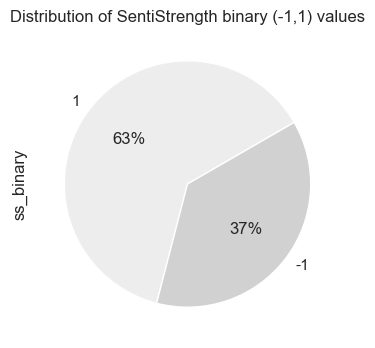

In [26]:
plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['ss_binary'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=30, 
                                          title='Distribution of SentiStrength binary (-1,1) values')

# count values of each label type
df['ss_binary'].value_counts()

-1    6702
 0    5067
 1    4239
Name: ss_trinary, dtype: int64

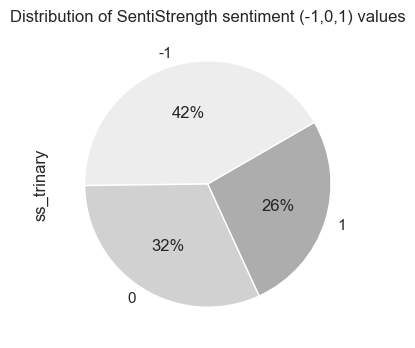

In [27]:
plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['ss_trinary'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=30, 
                                          title='Distribution of SentiStrength sentiment (-1,0,1) values')

# count values of each label type
df['ss_trinary'].value_counts()

 0    5937
-4    2584
 1    2462
-1    1822
 2    1003
-2     740
-3     686
 3     565
 4     209
Name: ss_scale, dtype: int64

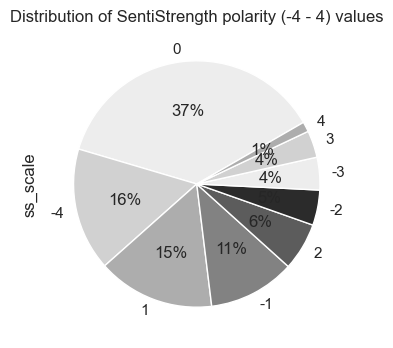

In [28]:
plt.figure(figsize=(4,4))
sns.set(style='white', palette='Greys', font_scale=1.0)

df['ss_scale'].value_counts().plot(kind='pie', 
                                          figsize=(4, 4),
                                          autopct='%1.0f%%',
                                          startangle=30, 
                                          title='Distribution of SentiStrength polarity (-4 - 4) values')

# count values of each label type
df['ss_scale'].value_counts()

# Results analysis for binary sentiment values

In [29]:
# change sentiment values to binary
df['sent_binary'] = df['sentiment']
df['sent_binary'] = df['sent_binary'].replace(0, 1)
df['sent_binary'] = df['sent_binary'].replace(1, 1)
df['sent_binary'] = df['sent_binary'].replace(-1, -1)
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens,sampleEmojis,ss_binary,ss_trinary,ss_scale,sent_binary
0,- - opetustilanteisiin,0,0,0,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22,- - opetustilanne,- - opetustilanne,- - opetustilanne,1,0,0,1
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,0,0,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85,"- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...",1,1,2,1
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51,= minä olla tulla Playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,1,0,0,1
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116,=) ( juuri sellainen joka Suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,1,1,1,1
4,=) kristiina ja anna jatkoon! =),1,3,0,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34,=) Kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,5,0,0,NaN,NaN,NaN,Meria,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,14,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,:face_with_tears_of_joy: :face_with_tears_of_j...,1,0,0,1
16004,😠👉👩‍💼,-1,-3,0,0,NaN,NaN,NaN,Meria,😠👉👩‍💼,5,😠 👉 👩 ‍ 💼,😠 👉 👩 ‍ 💼,:angry_face: :backhand_index_pointing_right: :...,1,0,0,-1
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,5,0,0,NaN,NaN,NaN,Meria,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,10,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,:rolling_on_the_floor_laughing: :rolling_on_th...,1,0,0,1
16006,🤮😡,-1,-4,0,0,NaN,NaN,NaN,Meria,🤮😡,2,🤮 😡,🤮 😡,:face_vomiting: :enraged_face:,1,0,0,-1


In [30]:
# count values of each label type
df['sent_binary'].value_counts()

 1    10672
-1     5336
Name: sent_binary, dtype: int64

In [31]:
# count values of each label type
df['ss_binary'].value_counts()

 1    10026
-1     5982
Name: ss_binary, dtype: int64

In [32]:
# create panda dataframe for results
df_ss_binary_results = pd.DataFrame({'sample':df['sample'], 'sentiment':df['sent_binary'], 'prediction':df['ss_binary']})
df_ss_binary_results

,sample,sentiment,prediction
0,- - opetustilanteisiin,1,1
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",1,1
2,= Minulle on tullut Playboy vuodesta 1972 läh...,1,1
3,=) (Juuri sellaiset joita suomessa myydään ha...,1,1
4,=) kristiina ja anna jatkoon! =),1,1
...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,1
16004,😠👉👩‍💼,-1,1
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,1
16006,🤮😡,-1,1


In [33]:
df_ss_binary_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sample      16008 non-null  object
 1   sentiment   16008 non-null  int64 
 2   prediction  16008 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 375.3+ KB


In [34]:
sentiments = df_ss_binary_results['sentiment'].tolist()
predictions = df_ss_binary_results['prediction'].tolist()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['negative', 'positive']

print(classification_report(sentiments, predictions, target_names=class_names, zero_division=0))

              precision    recall  f1-score   support

    negative       0.58      0.65      0.61      5336
    positive       0.81      0.76      0.79     10672

    accuracy                           0.73     16008
   macro avg       0.70      0.71      0.70     16008
weighted avg       0.73      0.73      0.73     16008



In [36]:
print(confusion_matrix(sentiments, predictions))

[[3460 1876]
 [2522 8150]]


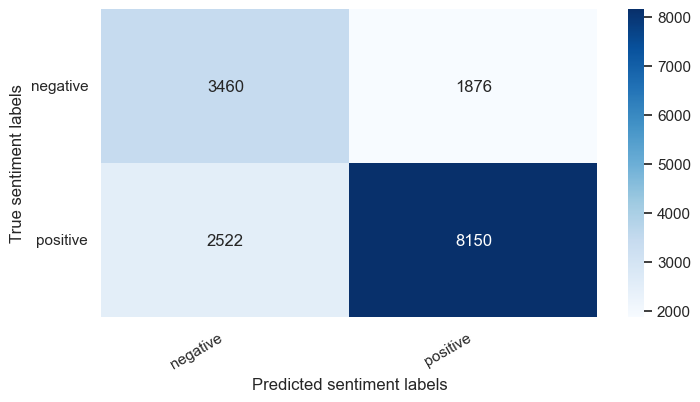

In [37]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment labels')
    plt.xlabel('Predicted sentiment labels');

cm = confusion_matrix(sentiments, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# calculate accuracy
total_accuracy = accuracy_score(sentiments, predictions, normalize=True, sample_weight=None)
print('Accuracy  ', total_accuracy)

# calculate f1
total_f1 = f1_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('F1  ', total_f1)

# calculate precision
total_precision = precision_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Precision  ', total_precision)

# calculate recall
total_recall = recall_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Recall  ', total_recall)

Accuracy   0.7252623688155923
F1   0.7288156161417322
Precision   0.7347249541696437
Recall   0.7252623688155924


In [39]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=sentiments, predict_vector=predictions)
cm.classes

[-1, 1]

In [40]:
cm.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.72526
F1 Macro                                                          0.69947
FPR Macro                                                         0.29395
Kappa                                                             0.4
NPV Macro                                                         0.69564
Overall ACC                                                       0.72526
PPV Macro                                                         0.69564
SOA1(Landis & Koch)                                               Moderate
TPR Macro                                                         0.70605
Zero-one Loss                                                     4398

Class Statistics :

Classes                                                           -1            1             
ACC(Accuracy)                                                     0.72526       0.72526       
AUC(Area under the ROC curve)   

# Results analysis for trinary sentiment values

In [41]:
# create panda dataframe for results
df_ss_trinary_results = pd.DataFrame({'sample':df['sample'], 'sentiment':df['sentiment'], 'prediction':df['ss_trinary']})
df_ss_trinary_results

,sample,sentiment,prediction
0,- - opetustilanteisiin,0,0
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,1
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,1
4,=) kristiina ja anna jatkoon! =),1,1
...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,0
16004,😠👉👩‍💼,-1,0
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,0
16006,🤮😡,-1,0


In [42]:
df_ss_trinary_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sample      16008 non-null  object
 1   sentiment   16008 non-null  int64 
 2   prediction  16008 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 375.3+ KB


In [43]:
sentiments = df_ss_trinary_results['sentiment'].tolist()
predictions = df_ss_trinary_results['prediction'].tolist()

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['negative', 'neutral', 'positive']

print(classification_report(sentiments, predictions, target_names=class_names, zero_division=0))

              precision    recall  f1-score   support

    negative       0.53      0.67      0.59      5336
     neutral       0.45      0.43      0.44      5336
    positive       0.68      0.54      0.60      5336

    accuracy                           0.55     16008
   macro avg       0.55      0.55      0.54     16008
weighted avg       0.55      0.55      0.54     16008



In [45]:
print(confusion_matrix(sentiments, predictions))

[[3570 1432  334]
 [2039 2275 1022]
 [1093 1360 2883]]


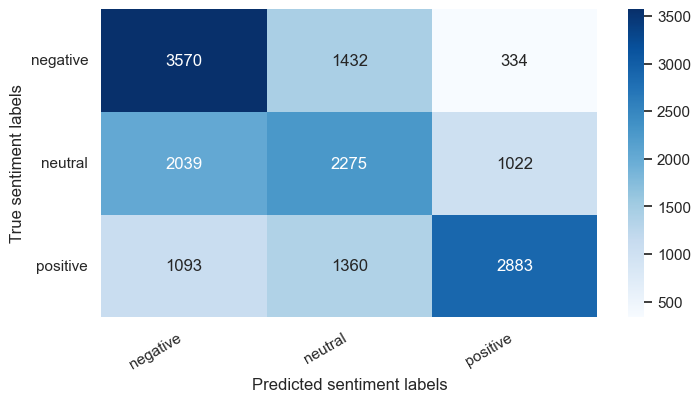

In [46]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment labels')
    plt.xlabel('Predicted sentiment labels');

cm = confusion_matrix(sentiments, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# calculate accuracy
total_accuracy = accuracy_score(sentiments, predictions, normalize=True, sample_weight=None)
print('Accuracy  ', total_accuracy)

# calculate f1
total_f1 = f1_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('F1  ', total_f1)

# calculate precision
total_precision = precision_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Precision  ', total_precision)

# calculate recall
total_recall = recall_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Recall  ', total_recall)

Accuracy   0.5452273863068465
F1   0.5442296089952751
Precision   0.5539245555479178
Recall   0.5452273863068465


In [48]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=sentiments, predict_vector=predictions)
cm.classes

[-1, 0, 1]

In [49]:
cm.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.69682
F1 Macro                                                          0.54423
FPR Macro                                                         0.22739
Kappa                                                             0.31784
NPV Macro                                                         0.77401
Overall ACC                                                       0.54523
PPV Macro                                                         0.55392
SOA1(Landis & Koch)                                               Fair
TPR Macro                                                         0.54523
Zero-one Loss                                                     7280

Class Statistics :

Classes                                                           -1            0             1             
ACC(Accuracy)                                                     0.69403       0.63437       0.76206       
AUC(

# Results analysis - for polarity values

In [50]:
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens,sampleEmojis,ss_binary,ss_trinary,ss_scale,sent_binary
0,- - opetustilanteisiin,0,0,0,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22,- - opetustilanne,- - opetustilanne,- - opetustilanne,1,0,0,1
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,0,0,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85,"- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...",1,1,2,1
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51,= minä olla tulla Playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,1,0,0,1
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116,=) ( juuri sellainen joka Suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,1,1,1,1
4,=) kristiina ja anna jatkoon! =),1,3,0,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34,=) Kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,5,0,0,NaN,NaN,NaN,Meria,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,14,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,:face_with_tears_of_joy: :face_with_tears_of_j...,1,0,0,1
16004,😠👉👩‍💼,-1,-3,0,0,NaN,NaN,NaN,Meria,😠👉👩‍💼,5,😠 👉 👩 ‍ 💼,😠 👉 👩 ‍ 💼,:angry_face: :backhand_index_pointing_right: :...,1,0,0,-1
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,5,0,0,NaN,NaN,NaN,Meria,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,10,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,:rolling_on_the_floor_laughing: :rolling_on_th...,1,0,0,1
16006,🤮😡,-1,-4,0,0,NaN,NaN,NaN,Meria,🤮😡,2,🤮 😡,🤮 😡,:face_vomiting: :enraged_face:,1,0,0,-1


In [51]:
# change sentiment values
df['polarity'] = df['polarity'].replace(-5, -4)
df['polarity'] = df['polarity'].replace(5, 4)
df

,sample,sentiment,polarity,HSbinary,HSstrength,HStarget,HStopic,HSform,user_nick,stringSample,stringLength,sampleLemmas,sample_tokens,sampleEmojis,ss_binary,ss_trinary,ss_scale,sent_binary
0,- - opetustilanteisiin,0,0,0,0,NaN,NaN,NaN,FinnSentiment,- - opetustilanteisiin,22,- - opetustilanne,- - opetustilanne,- - opetustilanne,1,0,0,1
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,0,0,0,NaN,NaN,NaN,FinnSentiment,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",85,"- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...","- "" treenata "" ja bailata kuten ennen - syödä ...",1,1,2,1
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,= Minulle on tullut Playboy vuodesta 1972 läh...,51,= minä olla tulla Playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,= minä olla tulla playboy vuosi 1972 lähtien .,1,0,0,1
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,0,0,0,NaN,NaN,NaN,FinnSentiment,=) (Juuri sellaiset joita suomessa myydään ha...,116,=) ( juuri sellainen joka Suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,=) ( juuri sellainen joka suomi myydä halpah...,1,1,1,1
4,=) kristiina ja anna jatkoon! =),1,3,0,0,NaN,NaN,NaN,FinnSentiment,=) kristiina ja anna jatkoon! =),34,=) Kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),=) kristiina ja antaa jatko ! =),1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,1,4,0,0,NaN,NaN,NaN,Meria,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,14,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂,:face_with_tears_of_joy: :face_with_tears_of_j...,1,0,0,1
16004,😠👉👩‍💼,-1,-3,0,0,NaN,NaN,NaN,Meria,😠👉👩‍💼,5,😠 👉 👩 ‍ 💼,😠 👉 👩 ‍ 💼,:angry_face: :backhand_index_pointing_right: :...,1,0,0,-1
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,1,4,0,0,NaN,NaN,NaN,Meria,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,10,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣,:rolling_on_the_floor_laughing: :rolling_on_th...,1,0,0,1
16006,🤮😡,-1,-4,0,0,NaN,NaN,NaN,Meria,🤮😡,2,🤮 😡,🤮 😡,:face_vomiting: :enraged_face:,1,0,0,-1


In [52]:
# create panda dataframe for results
df_polarity_results = pd.DataFrame({'sample':df['sample'], 'polarity':df['polarity'], 'prediction':df['ss_scale']})
df_polarity_results

,sample,polarity,prediction
0,- - opetustilanteisiin,0,0
1,"- ""Treenaa"" ja bailaa kuten ennenkin - Syö asi...",0,2
2,= Minulle on tullut Playboy vuodesta 1972 läh...,0,0
3,=) (Juuri sellaiset joita suomessa myydään ha...,0,1
4,=) kristiina ja anna jatkoon! =),3,1
...,...,...,...
16003,😂😂😂😂😂😂😂😂😂😂😂😂😂😂,4,0
16004,😠👉👩‍💼,-3,0
16005,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣,4,0
16006,🤮😡,-4,0


In [53]:
sentiments = df_polarity_results['polarity'].tolist()
predictions = df_polarity_results['prediction'].tolist()

In [54]:
# count values of each label type
df['polarity'].value_counts()

 0    5259
-4    3948
 4    2803
 3    2182
-3     797
-2     431
 2     276
-1     218
 1      94
Name: polarity, dtype: int64

In [55]:
# count values of each label type
df['ss_scale'].value_counts()

 0    5937
-4    2584
 1    2462
-1    1822
 2    1003
-2     740
-3     686
 3     565
 4     209
Name: ss_scale, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4']

print(classification_report(sentiments, predictions, target_names=class_names, zero_division=0))

              precision    recall  f1-score   support

          -4       0.77      0.50      0.61      3948
          -3       0.12      0.10      0.11       797
          -2       0.06      0.11      0.08       431
          -1       0.02      0.16      0.03       218
           0       0.45      0.51      0.48      5259
           1       0.01      0.37      0.03        94
           2       0.03      0.11      0.05       276
           3       0.19      0.05      0.08      2182
           4       0.71      0.05      0.10      2803

    accuracy                           0.32     16008
   macro avg       0.26      0.22      0.17     16008
weighted avg       0.50      0.32      0.34     16008



In [57]:
print(confusion_matrix(sentiments, predictions))

[[1981  265  205  226 1081  169   18    3    0]
 [ 215   82   71   83  282   45   11    7    1]
 [  84   32   46   60  163   34    8    4    0]
 [  23   27   20   34   78   22    8    5    1]
 [ 202  182  224  979 2667  756  186   53   10]
 [   0    3    4    5   31   35    8    7    1]
 [   6    9   15   37   87   56   30   28    8]
 [  40   62   98  279  749  589  221  105   39]
 [  33   24   57  119  799  756  513  353  149]]


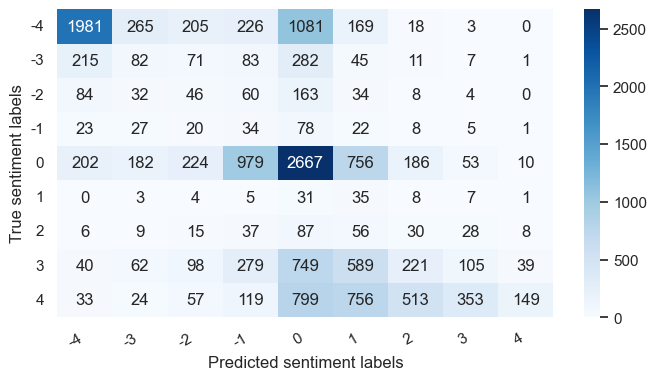

In [58]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment labels')
    plt.xlabel('Predicted sentiment labels');

cm = confusion_matrix(sentiments, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# calculate accuracy
total_accuracy = accuracy_score(sentiments, predictions, normalize=True, sample_weight=None)
print('Accuracy  ', total_accuracy)

# calculate f1
total_f1 = f1_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('F1  ', total_f1)

# calculate precision
total_precision = precision_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Precision  ', total_precision)

# calculate recall
total_recall = recall_score(sentiments, predictions, average='weighted', labels=np.unique(predictions), zero_division=0)
print('Recall  ', total_recall)

Accuracy   0.3204022988505747
F1   0.3428960258035018
Precision   0.49529387272200703
Recall   0.3204022988505747


In [60]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=sentiments, predict_vector=predictions)
cm.classes

[-4, -3, -2, -1, 0, 1, 2, 3, 4]

In [61]:
cm.stat(summary=True)

Overall Statistics : 

ACC Macro                                                         0.84898
F1 Macro                                                          0.17279
FPR Macro                                                         0.08932
Kappa                                                             0.17559
NPV Macro                                                         0.90978
Overall ACC                                                       0.3204
PPV Macro                                                         0.26212
SOA1(Landis & Koch)                                               Slight
TPR Macro                                                         0.21742
Zero-one Loss                                                     10879

Class Statistics :

Classes                                                           -4            -3            -2            -1            0             1             2             3             4             
ACC(Accuracy)              